In [3]:
def konstanta(prvi, drugi, k):

    poln_graf = graphs.CompleteGraph(k)

    kartezijski_prvega_in_polnega = prvi.cartesian_product(poln_graf)
    kartezijski_drugega_in_polnega = drugi.cartesian_product(poln_graf)

    kartezijski_prvega_in_drugega = drugi.cartesian_product(prvi)
    kartezijski_kartezijskega = kartezijski_prvega_in_drugega.cartesian_product(poln_graf)

    krt_prvega = kartezijski_prvega_in_polnega.dominating_set(value_only=True, total=True)
    krt_drugega = kartezijski_drugega_in_polnega.dominating_set(value_only=True, total=True)
    krt_obeh = kartezijski_kartezijskega.dominating_set(value_only=True, total=True)

    return (krt_prvega * krt_drugega) / krt_obeh

In [4]:
from sage.graphs.connectivity import is_connected
def spremeni_povezave(G):
    H = Graph(G)
    if random() < 0.5:
        H.delete_edge(H.random_edge())
        if is_connected(H):
            H
        else:
            H = Graph(G)
    else:
        if H.complement().size() == 0:
            H.delete_edge(H.random_edge())
        else:
            H.add_edge(H.complement().random_edge())
    return H

In [5]:
from sage.graphs.connectivity import is_connected
def spremeni_vozlisca(G):
    H = Graph(G)
    if random() < 0:
        H.delete_vertex(H.random_vertex(),1)
        if is_connected(H):
            H
        else:
            H = Graph(G)
    else:
        H.add_edge(H.random_vertex(), H.add_vertex())
        
    return H

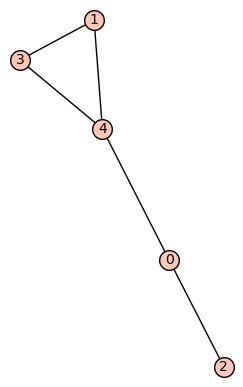

None


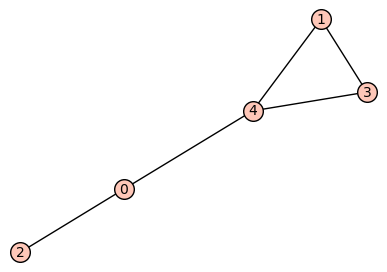

None


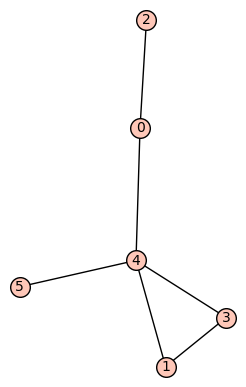

None


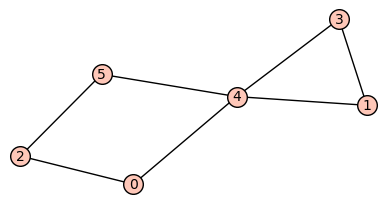

None


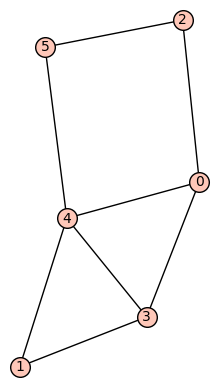

None


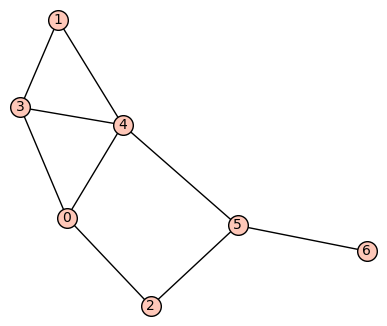

None


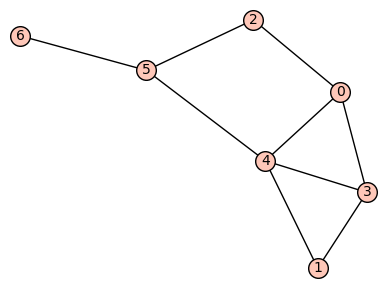

None


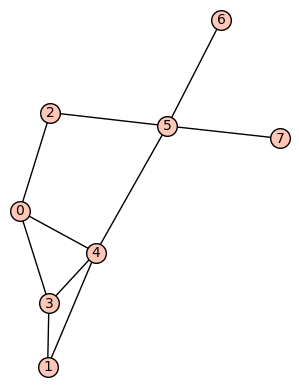

None


KeyboardInterrupt: 

In [6]:
k = 2

t = []
for G in graphs.nauty_geng('5 -c'):
    t.append(G)

prvi_graf = t[20]
G = t[10]
Temp = 1
p = 0
while order(G) > 2:
    
    if random() < 0.5:
        H = spremeni_povezave(G)
    else:
        H = spremeni_vozlisca(G)
    cost_H = konstanta(H, prvi_graf, k)
    cost_G = konstanta(G, prvi_graf, k)
    razlika = cost_H - cost_G
    if razlika > 0:
        G = H
    elif  exp(razlika / Temp) > random():
        G = H
    else:
        p += 1
        if p > 2:
            G = Graph()
            G.add_vertex(1)
    print G.show()
  

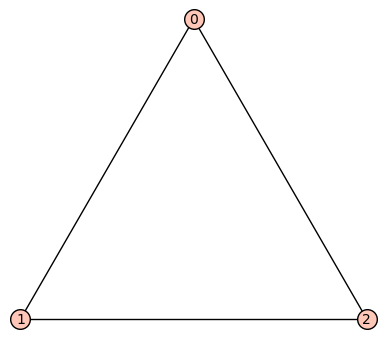

3

In [230]:
G = graphs.CompleteGraph(3)
G.show()
order(G)

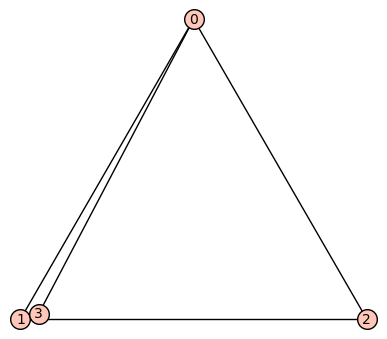

In [242]:
h = spremeni_vozlisca(G)
h.show()